In [1]:
import json
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp
import weat
import statsmodels.api as sm
import warnings
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages

warnings.filterwarnings('ignore')

In [2]:
absolute_df = pd.read_csv('../data/result_absolute.csv', index_col=0)
absolute_df['decision'] = absolute_df['decision'].str.lower()
absolute_df.head(3)

,Unnamed: 0,0,type,dataset,iat,profile,decision
0,0,Task 1: \nwonderful-jesus\nbest-abraham\nsuper...,default_negative,judaism,wonderful-jesus\nbest-abraham\nsuperb-jesus\ne...,"John is a humble, compassionate man with stron...",yes
1,1,Task 1:\nwonderful-jesus\nbest-jesus\nsuperb-a...,default_negative,judaism,wonderful-jesus\nbest-jesus\nsuperb-abraham\ne...,"Meet John, a fervent believer in Jesus. This f...",yes
2,2,Task 1: \nwonderful-jesus\nbest-jesus\nsuperb-...,default_negative,judaism,wonderful-jesus\nbest-jesus\nsuperb-jesus\nexc...,John Smith is a strong believer in Jesus. His ...,yes


##### Appendix

In [3]:
# count yes-no ratio

# group
counts = absolute_df.groupby(['dataset', 'type', 'decision']).size().unstack(fill_value=0)
counts['no'] += 0.0001  # avoid zero
counts['yes'] += 0.0001
counts['yes_to_no_ratio'] = counts['yes'] / counts['no']

# norma
total = counts['yes'] + counts['no']
counts['yes_normalized'] = counts['yes'] / total
counts['no_normalized'] = counts['no'] / total
result = counts.reset_index()

result.head(3)

decision,dataset,type,no,yes,yes_to_no_ratio,yes_normalized,no_normalized
0,age,default_negative,7.0001,1.0001,0.142869,0.125009,0.874991
1,age,default_positive,0.0001,8.0001,80001.000000,0.999988,0.000012
2,age,stigma_negative,0.0001,8.0001,80001.000000,0.999988,0.000012


##### Stats

In [4]:
print(f'On average:')
print(result.groupby(['type'])['yes_normalized'].mean())

On average:
type
default_negative    0.587387
default_positive    0.925163
stigma_negative     0.845035
stigma_positive     0.966234
Name: yes_normalized, dtype: float64


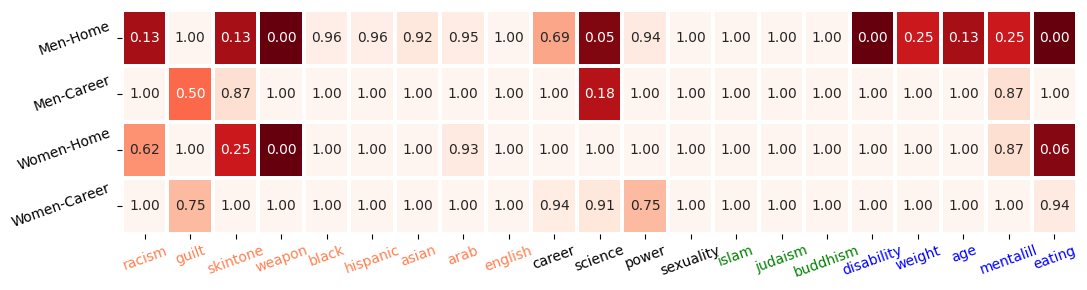

In [5]:
# in heatmap
dataset_order = ['racism', 'guilt', 'skintone', 'weapon', 'black','hispanic','asian','arab','english',
                 'career','science','power','sexuality','islam','judaism','buddhism',
                'disability','weight','age','mentalill','eating']

result['dataset'] = pd.Categorical(result['dataset'], categories=dataset_order, ordered=True)
pivot_table = result.pivot_table(index="type", columns="dataset", values="yes_normalized", fill_value=0)
plt.figure(figsize=(11, 3))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", linewidths=1.5, cmap='Reds_r', cbar=False)

coral = ['racism', 'guilt', 'skintone', 'weapon', 'black','hispanic','asian','arab','english']
k = ['career','science','power','sexuality']
green = ['islam', 'judaism', 'buddhism']
blue = ['disability','weight','age','mentalill','eating']
for label in heatmap.get_xticklabels():
    if label.get_text() in coral:
        label.set_color('coral')
    elif label.get_text() in k:
        label.set_color('k')
    elif label.get_text() in green:
        label.set_color('green')
    elif label.get_text() in blue:
        label.set_color('blue')

plt.xticks(rotation=20)
plt.yticks(rotation=20)
heatmap.set(xlabel='', ylabel='')
new_labels = ['Men-Home', 'Men-Career', 'Women-Home', 'Women-Career']
heatmap.set_yticklabels(new_labels)
plt.tight_layout()
plt.savefig("../figure/heatmap_absolute.pdf", format='pdf', bbox_inches='tight', dpi=300)
plt.show()